### Imports

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

### Raw Data

In [4]:
raw_data = pd.read_csv("../data/raw_data.csv")
raw_data

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
0,0,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,ATTCTAAACTGTACCCTGTTACTTATCCCCTTCCTATGACATGAAC...,HBB,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,7.875890e-01,0.0,0.0,0.0,0.0,0.0,22.650,20.146794,20.146794,31.050,31.050,Kim,0,2
1,1,chr1,38230662.0,38230684.0,-,CTCTGTCTCGCGCTGCTTTTGGG,AGAGGCTGCAAGTGTTGCTGCCTCCCCGAGGGTCGCCCCTCCTTAA...,EPHA10,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,3.840000e-04,0.0,0.0,0.0,0.0,0.0,-17.665,-51.262216,-51.262216,-9.265,-9.265,Kim,0,2
2,2,chr1,177593963.0,177593985.0,+,TCTACCCCACATGGCAGTAATGG,ATTTTTTATAGCTGGGGAGGTATTAGAGGAAAGACAGAACTGTACT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,3.050000e-04,0.0,0.0,0.0,0.0,0.0,13.760,6.245204,6.245204,22.160,22.160,Kim,0,2
3,3,chr1,191839001.0,191839023.0,+,CCATAGCACTCTTTAAAAAAAGC,ACAAACATAACACATATATATCTACACAGACAGACAAAAGATTCAG...,RP11-541F9.1,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-19.275,0.000000,-46.939290,0.000,-10.875,Kim,0,2
4,4,chr2,91869704.0,91869726.0,+,CTTACCTCACAGGGCAGTGAGAG,CCTTGGACAAACAACCTTGTCCTCAAGGTCCTCTGTGCCCCCATGT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,4.800000e-05,0.0,0.0,0.0,0.0,0.0,11.610,2.751414,3.057127,18.009,20.010,Kim,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,25627,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGT,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,9.614866e-20,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25628,25628,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTA,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,5.104533e-17,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25629,25629,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTC,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,1.125790e-19,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25630,25630,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTG,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,7.712115e-06,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2


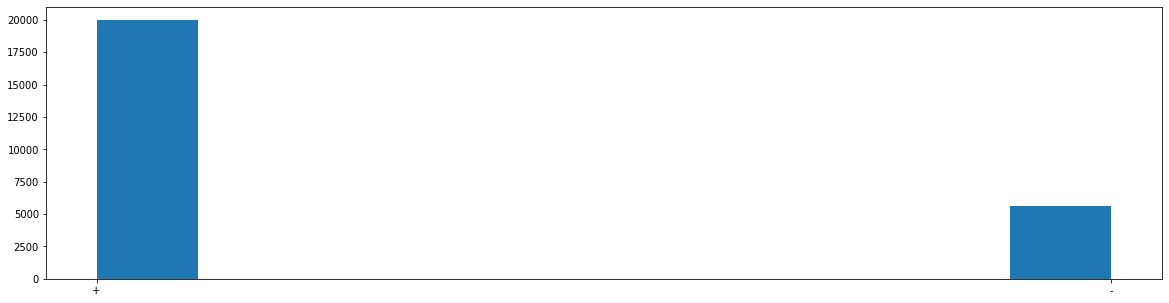

In [4]:
target_strands = raw_data.target_strand
fig = plt.figure(figsize = (20, 5))
plt.hist(target_strands)
plt.show()

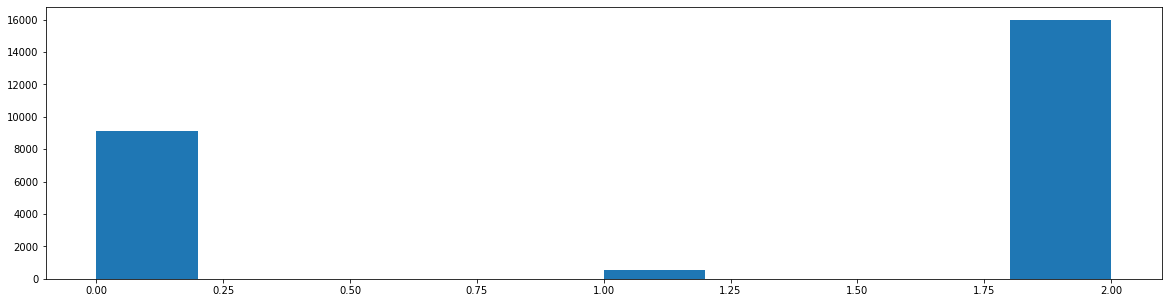

In [5]:
delivery = raw_data.delivery_mode
fig = plt.figure(figsize = (20, 5))
plt.hist(delivery)
plt.show()

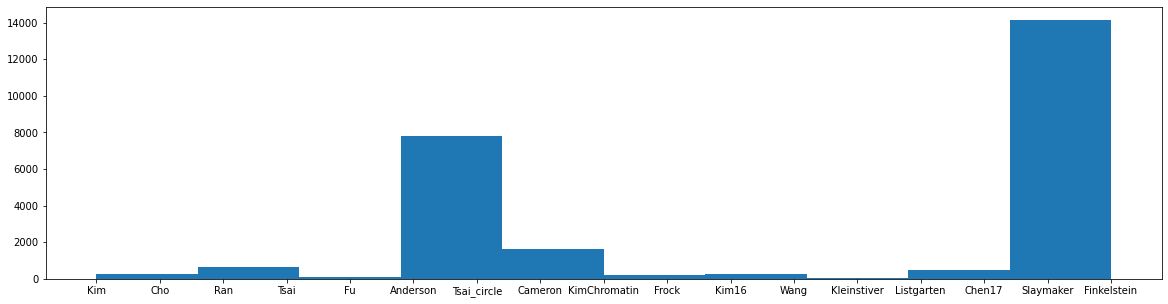

In [6]:
studies = raw_data.study_name
fig = plt.figure(figsize = (20, 5))
plt.hist(studies)
plt.show()

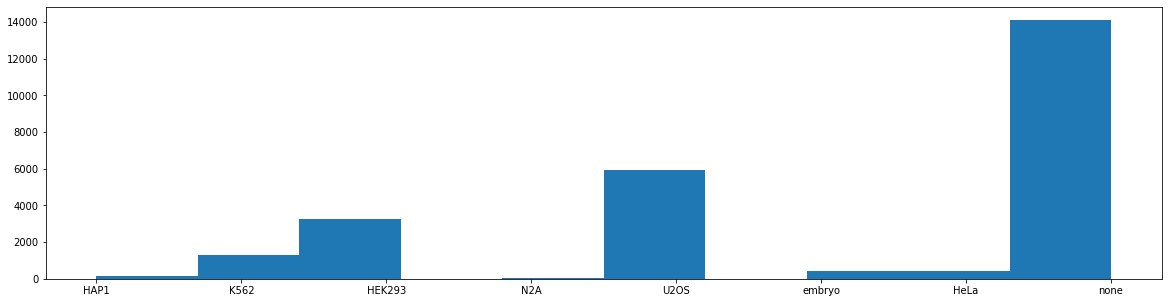

In [7]:
cells = raw_data.cell_line.fillna('none')
fig = plt.figure(figsize = (20, 5))
plt.hist(cells)
plt.show()

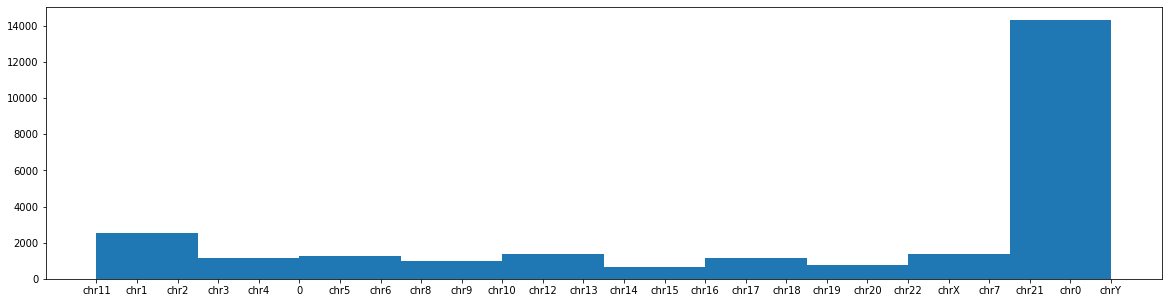

In [8]:
target_chromosome = raw_data.target_chr.fillna("chr0")
target_chromosome = target_chromosome.dropna()
fig = plt.figure(figsize = (20, 5))
plt.hist(target_chromosome)
plt.show()

In [9]:
gRNASeq = raw_data[["grna_target_sequence", "study_name"]].drop_duplicates()
gRNASeq

,grna_target_sequence,study_name
0,CTTGCCCCACAGGGCAGTAACGG,Kim
76,GGGTGGGGGGAGTTTGCTCCTGG,Kim
162,TGACATCAATTATTATACATCGG,Cho
176,GAATCCTAAAAACTCTGCTTCGG,Cho
190,GACACCGAAGCAGAGTTTTTAGG,Cho
...,...,...
11480,GGTGAGTGAGTGTGTGCGTGTGG,Chen17
11493,GGTGAGTGAGTGTGTGCGTGTGG,Slaymaker
11519,GAGTCCGAGCAGAAGAAGAAGGG,Slaymaker
11524,GACGCATAAAGATGAGACGCTGG,Finkelstein


In [10]:
raw_data["cleavage_freq"].dropna()

0        7.875890e-01
1        3.840000e-04
2        3.050000e-04
3        0.000000e+00
4        4.800000e-05
             ...     
25627    9.614866e-20
25628    5.104533e-17
25629    1.125790e-19
25630    7.712115e-06
25631    1.490279e-22
Name: cleavage_freq, Length: 25554, dtype: float64

In [11]:
raw_data[raw_data['grna_target_sequence'].str.len() != raw_data['target_sequence'].str.len()].dropna()

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
290,290,chr1,22031858.0,22031877.0,+,AATTGTCTGAAGCCTGGCCAGG,ACTGAATGGTAACACACATTTGCTTACTGGTGTATTTTCCTGGAAG...,USP48,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,0.000020,0.000,0.0,0.0,0.014,0.0,7.660,-7.000080,-7.000080,10.560,10.560,Ran,0,1
298,298,chr5,172300612.0,172300631.0,+,TGGGGAGCTTTGGGGAGGCCGG,TTTTTATCCGATGATGGGCCACTTTTGAAAAACCCCGCTCATGCTC...,ERGIC1,chr2,73161174.0,73161196.0,+,GGCCAGGCTTTGGGGAGGCCTGG,hg19,HEK293,0.000100,0.000,0.0,0.0,0.009,0.0,-7.520,-35.848117,-35.848117,-0.820,-0.820,Ran,0,1
301,301,chr16,88818445.0,88818464.0,+,CCTGAGGCTGTGGGGAGGCCGG,TCCCCCAGCTCCCCCAGGAGCCCTCCCTGAAGTTAAGATCCCCTCT...,PIEZO1,chr2,73161174.0,73161196.0,+,GGCCAGGCTTTGGGGAGGCCTGG,hg19,HEK293,0.000020,0.000,0.0,0.0,0.009,0.0,-12.425,-44.742577,-44.742577,-5.725,-5.725,Ran,0,1
305,305,chr5,105649.0,105668.0,+,GGCAGTGGTTTGGGGAGGCCGG,ACAGTGCACAGTGGGTGAGGGCTGTTCTGGTTCTGGTGTTCCCGTC...,PLEKHG4B,chr2,73161174.0,73161196.0,+,GGCCAGGCTTTGGGGAGGCCTGG,hg19,HEK293,0.000240,0.000,0.0,0.0,0.005,0.0,-7.065,-35.531597,-35.531597,-0.365,-0.365,Ran,0,1
313,313,chr9,93629455.0,93629474.0,+,TCCTTCCCAAAGCCTGGCCAGG,CATACGGGAAAAAAAAGGCATACGCCCTATGTGTACAACTCAATTA...,SYK,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,0.000600,0.000,0.0,0.0,0.005,0.0,22.330,13.095817,13.095817,25.230,25.230,Ran,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,5918,chr7,101055359.0,101055382.0,-,CACCACCTCTACCCCAGCCTCAGG,TCATTACAACCTCCGCCTCCCAGGTTCAAGGGGTTCTCCTGTCTCA...,COL26A1,chr6,43738556.0,43738578.0,-,GACCCCCTCCACCCCGCCTCCGG,hg19,U2OS,0.000050,0.000,0.0,0.0,0.000,0.0,8.180,-18.924621,-18.924621,8.180,8.180,Tsai_circle,1,0
5972,5972,chr14,93525558.0,93525581.0,-,CACACCCTCCACCCCTGCCTCGAG,GACCCGCACCCCCTCCACCCCTGCCTCGTGACCCGCACCCCCTCCA...,ITPK1,chr6,43738556.0,43738578.0,-,GACCCCCTCCACCCCGCCTCCGG,hg19,U2OS,0.000043,0.076,0.0,0.0,0.000,0.0,10.660,-13.534108,-15.037898,9.594,10.660,Tsai_circle,1,0
7196,7196,chr21,35765458.0,35765481.0,-,TGTGAGTGATGTGTGTGTGTGCGG,AAGGCCCACCCAGGCAGAAGCGCAAGTGGACCAAGCCTACCGCTGA...,SMIM11A,chr6,43737454.0,43737476.0,+,GGTGAGTGAGTGTGTGCGTGTGG,hg19,U2OS,0.000305,0.025,0.0,0.0,0.000,0.0,6.610,-18.019131,-18.019131,6.610,6.610,Tsai_circle,1,0
8022,8022,chr21,47639252.0,47639275.0,-,GGGTGGGTGGAGTTAGGCTCCTGG,CTTCCTGGGGCCAGGGGTTGCAAACACCTCTCCTGGGGCTGGACAC...,LSS,chr6,43737291.0,43737313.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg19,U2OS,0.000872,0.052,0.0,0.0,0.000,0.0,5.000,-21.000482,-21.000482,8.600,8.600,Tsai_circle,1,0


In [12]:
d = raw_data[raw_data["study_name"] == "Cameron"]
d

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
8828,8828,chr6,14316136.0,14316158.0,-,GTGGGGGTAGAGTTTGCTCCAGG,GGCCAGGCACTGAAGCTGCACCCACACAGCCAGCAAGCCCGGCCTG...,NaN,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,0.029024,0.33,0.0,0.0,0.000,0.0,13.570,-2.498325,-2.498325,17.170,17.170,Cameron,1,2
8829,8829,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,GCGGACGCTCAGTGAAGCCTGGCCCGCAGCCCGCCGCAATGAAGGG...,NaN,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,0.441659,0.35,0.0,0.0,0.000,0.0,32.800,26.115129,26.115129,36.400,36.400,Cameron,1,2
8830,8830,chr20,57600294.0,57600316.0,-,AGGGAGGAGGAATTTGCTCCAGG,CTGGGATCCCCAGAGTATTTTCTCATAGAGTACCCAGTTTGCAAAC...,RP4-718J7.4,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,0.005438,0.00,0.0,0.0,0.000,0.0,16.430,2.671876,2.671876,20.030,20.030,Cameron,1,2
8831,8831,chr17,41640070.0,41640092.0,-,TAGTGGAGGGAGCTTGCTCCTGG,AAAAATAGAAAAAATTAGCTGGGCGCGGTGGTGGGCACTTGTAATC...,KRT42P,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,0.266632,0.00,0.0,0.0,0.000,0.0,23.310,13.080873,13.080873,26.910,26.910,Cameron,1,2
8832,8832,chr15,65345193.0,65345215.0,-,GGATGGAGGGAGTTTGCTCCTGG,TGACAGTGACCTAAGATCCTGGCTCTGGTGCTTTCATCCTTCTGAT...,IGDCC3,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,0.423417,0.01,0.0,0.0,0.000,0.0,26.310,18.923241,18.923241,29.910,29.910,Cameron,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,10453,chr12,15656586.0,15656608.0,-,GATTGACAAGAGGCAGTAAGGGA,TGGTCTTTATAAGGGATTGGGAGACCTTTGACAACTGAAGAGTTTT...,EPS8,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,0.000083,0.00,0.0,0.0,0.000,0.0,11.055,-8.374505,-10.468131,9.884,12.355,Cameron,1,2
10454,10454,chr19,20882845.0,20882867.0,-,GGTGAACAAGTGGCAGACAGTGA,TGAATGAATTGATGAGAGTGAACAGGTTCCTACAGTGGTGAATATG...,NaN,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,0.000368,0.00,0.0,0.0,0.000,0.0,23.210,8.325148,10.406435,19.608,24.510,Cameron,1,2
10455,10455,chrX,72305598.0,72305620.0,+,CAGGATGGACAGGCAGGAAGGGG,CTGATGCCTGGCGGCCCCCCGGCCACCAGTTCCCAGTCCCGCTGCC...,CITED1,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,-0.000620,0.00,0.0,0.0,0.178,0.0,-0.175,-29.849349,-29.849349,1.125,1.125,Cameron,1,2
10456,10456,chrX,111124189.0,111124211.0,-,GGTGTACAAGTGGCAGTACTGGC,GAGGTCACCTGAAGTATTGGCAAAAAATGGAAATGTCAGCTTCTCT...,PAK3,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,-0.000133,0.00,0.0,0.0,0.000,0.0,17.440,0.000000,0.161497,0.000,18.740,Cameron,1,2


In [13]:
raw_data[raw_data["cleavage_freq"] < 1e-05]

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
3,3,chr1,191839001.0,191839023.0,+,CCATAGCACTCTTTAAAAAAAGC,ACAAACATAACACATATATATCTACACAGACAGACAAAAGATTCAG...,RP11-541F9.1,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-19.275,0.000000,-46.939290,0.000,-10.875,Kim,0,2
6,6,chr2,75133135.0,75133157.0,+,ATGCAAGTCCAATATCCAGTGGG,AAAAGGCACTTCTTACATGGTGGCAGCAGGAGAAAATGAAGAAGAA...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-11.975,-36.567661,-36.567661,-3.575,-3.575,Kim,0,2
7,7,chr2,211832273.0,211832295.0,-,TAAGCCCCACACAGCAGTTAAGG,CCATAGACAGTTCCTTCAGATTATCAAATAGTGCATTTCTCAGTCT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,8.340,-5.629017,-5.629017,16.740,16.740,Kim,0,2
8,8,chr2,240591533.0,240591555.0,-,ACAGCCCCACAGGGCACTAGAGG,AGCGAGGAGCCACCATCCCCGAGTTCTTCATCCTCACTCGTCTCAT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,14.770,3.460638,3.460638,23.170,23.170,Kim,0,2
12,12,chr4,45763598.0,45763620.0,-,GCTGCCCCACATGACAGAAATGG,ACCTCTAAGCCAAAGATAGTTTAAAGCCTGAAAGCCAAGCTACAAG...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,9.560,-4.353939,-4.353939,17.960,17.960,Kim,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,25627,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGT,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,9.614866e-20,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25628,25628,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTA,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,5.104533e-17,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25629,25629,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTC,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,1.125790e-19,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25630,25630,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTG,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,7.712115e-06,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2


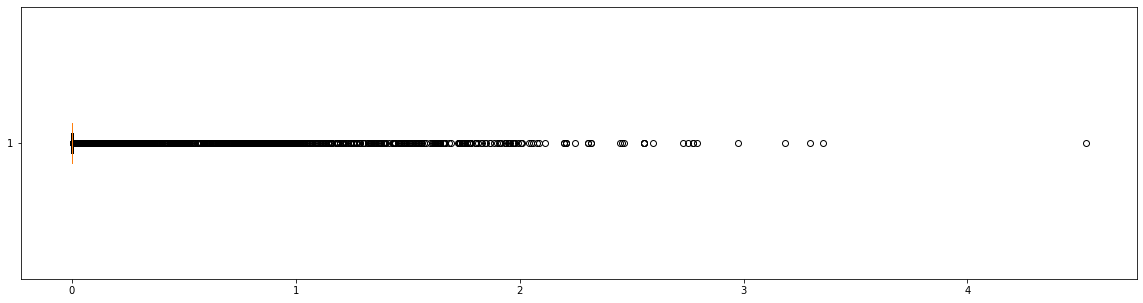

In [14]:
activity = raw_data.cleavage_freq.dropna()
fig = plt.figure(figsize = (20, 5))
plt.boxplot(activity, showfliers=True, vert = False)
plt.show()

In [15]:
activity.describe()

count    25554.000000
mean         0.036487
std          0.197799
min         -0.001531
25%          0.000039
50%          0.000198
75%          0.001841
max          4.528628
Name: cleavage_freq, dtype: float64

In [23]:
not_fink = raw_data[raw_data["study_name"] != "Finkelstein"]
not_fink = not_fink[not_fink["cleavage_freq"] < 0]
not_fink[not_fink["study_name"] == "Cameron"]

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
8841,8841,chr12,52572348.0,52572370.0,-,GAGATGGGGGAGTATGCACCAGG,CCTTGTCCAGAAGGCTAGGAAATGAGCACTTGTAAAGGATCTAGTT...,KRT74,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,-0.000561,0.00,0.0,0.0,0.000,0.0,15.480,-3.052786,-3.052786,19.080,19.080,Cameron,1,2
8843,8843,chr2,128442226.0,128442248.0,+,TCCTGAGGGCAGTTTGCTCCAGG,GCCGTCCAGGGGACGCCACTGACCCCTTGGTCAGTTCAGCCATCAC...,NaN,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,-0.000210,0.00,0.0,0.0,0.000,0.0,17.670,1.654309,1.654309,21.270,21.270,Cameron,1,2
8846,8846,chr15,101272813.0,101272835.0,-,AAGGAGGCGGAGCTTGCTCCTGG,TCATGAGGGAGTGGGGTGGTTGGGGGTAGGGAAGGATACAGAAGAC...,VIMP,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,-0.000438,0.00,0.0,0.0,0.000,0.0,15.005,-2.783611,-2.783611,18.605,18.605,Cameron,1,2
8848,8848,chr22,41280741.0,41280763.0,+,AGTGCAGGGGAGCTTGCTCCTGG,CAGGCATGTCCAGACCAGTTCCCCTGGTTGGGCCAGAATCCCAGGA...,RANGAP1,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,-0.000270,0.75,0.0,0.0,0.000,0.0,17.090,-0.969920,-0.969920,20.690,20.690,Cameron,1,2
8853,8853,chr11,122712786.0,122712808.0,+,AGAAGAGGGGATTTTGCTCCTGG,CTCAAAGTCCTCTGGAGGGCGGTAGCTGACATGAAGCTCCAGCATG...,UBASH3B,chr6,43769554.0,43769576.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg38,HEK293,-0.000263,0.00,0.0,0.0,0.000,0.0,14.945,-1.633444,-1.633444,18.545,18.545,Cameron,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10449,10449,chr2,27078479.0,27078501.0,+,AGTTAACAAGAAGCAGATGTGGC,TCTGCCTCAGTGGAGTCCTTGACCTTTTCCTCCCTGGCCCAGCAGC...,NaN,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,-0.000340,0.00,0.0,0.0,0.000,0.0,8.800,0.000000,-12.195072,0.000,10.100,Cameron,1,2
10450,10450,chr11,34603041.0,34603063.0,-,GGGAAGACAAGAGGAGAAGGGGA,GCCTACGACCAATTTGCTGAATCAGTCATTTCAAGATGGTGCCCGG...,NaN,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,-0.000103,0.00,0.0,0.0,0.000,0.0,-7.750,-34.997967,-43.747459,-5.160,-6.450,Cameron,1,2
10451,10451,chr12,81196684.0,81196706.0,-,GGCACACAAGAAGCAGATGTGGC,AGAATTATTCATGGTAATTTTCATCTATAGAAGATAATACCTTTAA...,ACSS3,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,-0.000057,0.00,0.0,0.0,0.000,0.0,11.105,0.000000,-12.284907,0.000,12.405,Cameron,1,2
10455,10455,chrX,72305598.0,72305620.0,+,CAGGATGGACAGGCAGGAAGGGG,CTGATGCCTGGCGGCCCCCCGGCCACCAGTTCCCAGTCCCGCTGCC...,CITED1,chr2,216109346.0,216109368.0,-,GGTGGACAAGCGGCAGATAGCGG,hg38,HEK293,-0.000620,0.00,0.0,0.0,0.178,0.0,-0.175,-29.849349,-29.849349,1.125,1.125,Cameron,1,2


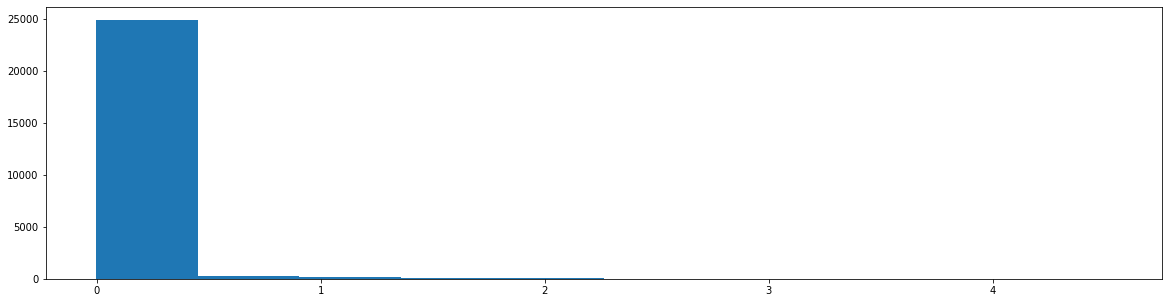

In [17]:
fig = plt.figure(figsize = (20, 5))
plt.hist(activity)
plt.show()

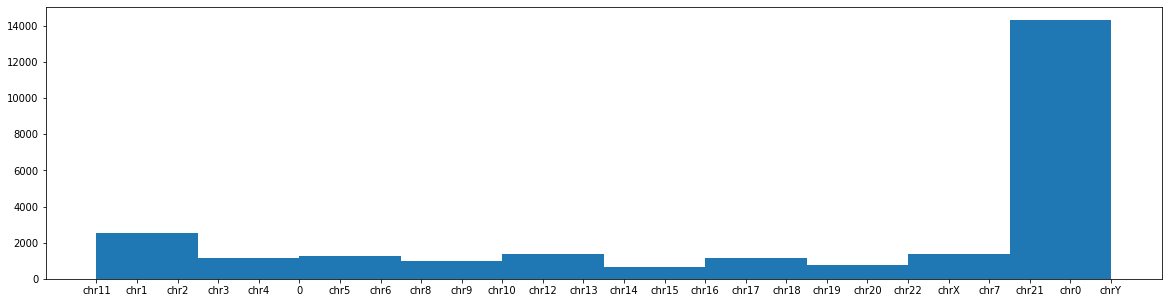

In [18]:
target_chromosome = raw_data.target_chr.fillna("chr0")
target_chromosome = target_chromosome.dropna()
fig = plt.figure(figsize = (20, 5))
plt.hist(target_chromosome)
plt.show()

In [19]:
activity[activity > 0.2]

0        0.787589
31       0.857651
108      0.873003
142      0.793822
162      0.602074
           ...   
25341    0.804676
25599    0.727046
25606    0.847845
25613    0.693183
25626    0.987475
Name: cleavage_freq, Length: 894, dtype: float64

In [20]:
activity.shape

(25554,)

In [27]:
dups = raw_data[raw_data.duplicated(subset=["target_sequence", "grna_target_sequence", "study_name"], keep = False)]
dups

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
6,6,chr2,75133135.0,75133157.0,+,ATGCAAGTCCAATATCCAGTGGG,AAAAGGCACTTCTTACATGGTGGCAGCAGGAGAAAATGAAGAAGAA...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.000,0.0,-11.975,-36.567661,-36.567661,-3.575,-3.575,Kim,0,2
38,38,chr10,92763726.0,92763748.0,+,ATGCAAGTCCAATATCCAGTGGG,TATATGATGGCAGTCAAAAGTGTGTGTGCAGGGGAATTGCCCTTTA...,RP11-236B18.2,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,7.500000e-05,0.0,0.0,0.0,0.000,0.0,-11.975,-36.567661,-36.567661,-3.575,-3.575,Kim,0,2
278,278,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,GCCTGTTTCTCCTGCTGTGGAGCTGGAGGTAGAGACCAGGGTCCCC...,EMX1,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,1.927400e-01,0.0,0.0,0.0,0.018,0.0,30.700,26.661444,26.661444,36.100,36.100,Ran,0,1
279,279,chr11,44986456.0,44986478.0,-,GACCTCCCCATAGCCTGGCCAGG,AATAATGAGATGAACGAATCAGGTCTGAGAGGATCTACAAATGTTT...,NaN,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,1.900100e-01,0.0,0.0,0.0,0.005,0.0,22.945,14.251833,14.251833,28.345,28.345,Ran,0,1
310,310,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,GCCTGTTTCTCCTGCTGTGGAGCTGGAGGTAGAGACCAGGGTCCCC...,EMX1,chr2,73161171.0,73161193.0,-,GGCCTCCCCAAAGCCTGGCCAGG,hg19,HEK293,1.927000e-01,0.0,0.0,0.0,0.018,0.0,30.700,26.661444,26.661444,36.100,36.100,Ran,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,25627,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGT,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,9.614866e-20,0.0,0.0,0.0,0.000,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25628,25628,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTA,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,5.104533e-17,0.0,0.0,0.0,0.000,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25629,25629,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTC,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,1.125790e-19,0.0,0.0,0.0,0.000,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25630,25630,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTG,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,7.712115e-06,0.0,0.0,0.0,0.000,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2


In [28]:
dups.to_csv("../data/duplicates.csv")

In [5]:
import pandas as pd

In [6]:
preds = pd.read_csv("../results/predictions.csv")
preds

,Unnamed: 0,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,...,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode,predictions
0,24268,24268,NaN,NaN,NaN,+,GTGATAAGTGGAATTGCCATTGTGG,NaN,NaN,NaN,...,0.0,-14.560,-50.436216,-50.436216,-12.060,-12.060,Finkelstein,0,2,NaN
1,393,393,chr17,4358745.0,4358768.0,-,TACCCCCCACACCCCGCCTCTGG,TCTTAAGCTGAGTGAGGGGCTTCAGGTGACACTCACCCCCCCCCCA...,SPNS3,chr6,...,0.0,26.775,13.487175,13.487175,26.775,26.775,Tsai,1,0,NaN
2,12171,12171,NaN,NaN,NaN,+,GACGCACAAAAATGAGACGCTGG,NaN,NaN,NaN,...,0.0,25.415,14.576871,14.576871,25.415,25.415,Finkelstein,0,2,NaN
3,18475,18475,NaN,NaN,NaN,+,GACGCATAAAGATGAGAGCGTGG,NaN,NaN,NaN,...,0.0,21.950,7.171613,7.171613,21.950,21.950,Finkelstein,0,2,NaN
4,11121,11121,chr22,49739984.0,49740006.0,+,GGTGTGTGAGTGTGTGTGTGTGG,AAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAGAAAGAAACTGCC...,NaN,chr6,...,0.0,21.070,3.663198,3.663198,21.070,21.070,Listgarten,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,20410,20410,NaN,NaN,NaN,+,GTGATAAGTGGACTGCCATATGG,NaN,NaN,NaN,...,0.0,19.620,8.872069,8.872069,22.120,22.120,Finkelstein,0,2,NaN
5123,20530,20530,NaN,NaN,NaN,+,GTGATAGGTGGAATGCCATGAGG,NaN,NaN,NaN,...,0.0,20.165,12.332332,12.332332,22.665,22.665,Finkelstein,0,2,NaN
5124,22952,22952,NaN,NaN,NaN,+,GTGATAAGTGGAGATTGCCATGTGG,NaN,NaN,NaN,...,0.0,-2.370,-26.356476,-26.356476,0.130,0.130,Finkelstein,0,2,NaN
5125,19460,19460,NaN,NaN,NaN,+,GTGATAAGTGGGGTGCCATGTGG,NaN,NaN,NaN,...,0.0,17.810,3.619913,3.619913,20.310,20.310,Finkelstein,0,2,NaN


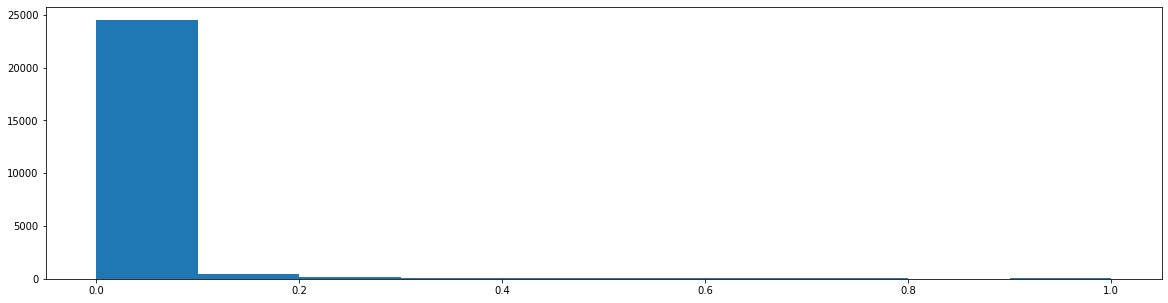

In [12]:
epig = raw_data.epigen_ctcf
epig = epig.dropna()
fig = plt.figure(figsize = (20, 5))
plt.hist(epig)
plt.show()

In [11]:
target_seq = raw_data["target_sequence"]

In [12]:
target_seq

0        CTTGCCCCACAGGGCAGTAACGG
1        CTCTGTCTCGCGCTGCTTTTGGG
2        TCTACCCCACATGGCAGTAATGG
3        CCATAGCACTCTTTAAAAAAAGC
4        CTTACCTCACAGGGCAGTGAGAG
                  ...           
25627    GTGATAAGTGGAATGCCATGTGT
25628    GTGATAAGTGGAATGCCATGTTA
25629    GTGATAAGTGGAATGCCATGTTC
25630    GTGATAAGTGGAATGCCATGTTG
25631    GTGATAAGTGGAATGCCATGTTT
Name: target_sequence, Length: 25632, dtype: object

In [13]:
raw_data[raw_data["target_sequence"] == raw_data["grna_target_sequence"]]

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
0,0,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,ATTCTAAACTGTACCCTGTTACTTATCCCCTTCCTATGACATGAAC...,HBB,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.787589,0.0,0.0,0.0,0.000,0.0,22.65,20.146794,20.146794,31.05,31.05,Kim,0,2
108,108,chr6,43737291.0,43737313.0,-,GGGTGGGGGGAGTTTGCTCCTGG,GCGGACGCTCAGTGAAGCCTGGCCCGCAGCCCGCCGCAATGAAGGG...,NaN,chr6,43737291.0,43737313.0,-,GGGTGGGGGGAGTTTGCTCCTGG,hg19,HAP1,0.873003,0.0,0.0,0.0,0.576,0.0,32.80,26.115129,26.115129,36.40,36.40,Kim,0,2
162,162,chr3,46414423.0,46414445.0,+,TGACATCAATTATTATACATCGG,GCTTGAGCCCGGGATGGTCCAGGCTGCAGTGAGCCATGATCGTGCC...,RP11-24F11.2,chr3,46414423.0,46414445.0,+,TGACATCAATTATTATACATCGG,hg19,K562,0.602074,0.0,0.0,0.0,0.000,0.0,18.50,8.036533,8.036533,18.50,18.50,Cho,0,0
176,176,chr3,46415040.0,46415062.0,+,GAATCCTAAAAACTCTGCTTCGG,TCATCCTGATAAACTGCAAAAGGCTGAAGAGCATGACTGACATCTA...,RP11-24F11.2,chr3,46415040.0,46415062.0,+,GAATCCTAAAAACTCTGCTTCGG,hg19,K562,0.321896,0.0,0.0,0.0,0.000,0.0,22.85,12.566068,12.566068,22.85,22.85,Cho,0,0
190,190,chr3,46415044.0,46415066.0,-,GACACCGAAGCAGAGTTTTTAGG,TTTTAAAAAAGACCTCTCCCACCCCACCCCCAGCCCAGGCTGTGTA...,RP11-24F11.2,chr3,46415044.0,46415066.0,-,GACACCGAAGCAGAGTTTTTAGG,hg19,K562,0.346024,0.0,0.0,0.0,0.000,0.0,24.45,11.135222,11.135222,24.45,24.45,Cho,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,11519,chr2,73160997.0,73161019.0,+,GAGTCCGAGCAGAAGAAGAAGGG,CTACTCACATCCACTCTGTGAAGAAGCGATTATGATCTCTCCTCTA...,EMX1,chr2,73160997.0,73161019.0,+,GAGTCCGAGCAGAAGAAGAAGGG,hg19,HEK293,0.689539,0.0,0.0,0.0,0.005,0.0,28.25,17.988268,17.988268,28.25,28.25,Slaymaker,0,1
11524,11524,NaN,NaN,NaN,+,GACGCATAAAGATGAGACGCTGG,NaN,NaN,NaN,NaN,NaN,+,GACGCATAAAGATGAGACGCTGG,NaN,NaN,0.877599,0.0,0.0,0.0,0.000,0.0,28.70,21.484870,21.484870,28.70,28.70,Finkelstein,0,2
18572,18572,NaN,NaN,NaN,+,GACGCATAAAGATGAGACGCTGG,NaN,NaN,NaN,NaN,NaN,+,GACGCATAAAGATGAGACGCTGG,NaN,NaN,0.000018,0.0,0.0,0.0,0.000,0.0,28.70,21.484870,21.484870,28.70,28.70,Finkelstein,0,2
18578,18578,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,0.987475,0.0,0.0,0.0,0.000,0.0,24.40,18.270788,18.270788,26.90,26.90,Finkelstein,0,2
